## Librerias

In [60]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np, time, os
from scipy.signal import convolve2d


## Funciones previas

In [61]:
def plot_grid(grid,save:bool = False,consecutive:int = 0):
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    
    if not(save): plt.show()
    else:
        plt.savefig(f'Imagenes/{consecutive}.png')
        plt.close()

def crear_gif(imagenes_path:str,output_name:str):
    imagenes = sorted(os.listdir(imagenes_path),key=lambda x: int(os.path.splitext(x)[0]))
    frames = [Image.open(os.path.join(imagenes_path,imagen)) for imagen in imagenes]
    frames[0].save(
        output_name,
        save_all=True,
        append_images=frames[1:],
        duration=500,  # Duración de cada frame en milisegundos
        loop=0  # 0 significa que el GIF se repetirá infinitamente
    )
    print("GIF guardado")

def update_rule(lattice, i, j):
    n_neigh = lattice[i + 1][j] + lattice[i][j + 1] + lattice[i + 1][j + 1] + \
            lattice[i + 1][j - 1] + lattice[i - 1][j] + lattice[i][j - 1] + \
            lattice[i - 1][j + 1] + lattice[i - 1][j - 1]
    
    if (lattice[i][j] == 1) and (n_neigh in [2, 3]):
        return 1
    elif lattice[i][j] == 1:
        return 0
    elif (lattice[i][j] == 0) and (n_neigh == 3):
        return 1
    else:
        return 0

def update(lattice):
    box_length = len(lattice) - 2
    lattice_new = [[0 for _ in range(box_length + 2)] for _ in range(box_length + 2)]

    for i in range(1, box_length + 1):
        for j in range(1, box_length + 1):
            lattice_new[i][j] = update_rule(lattice, i, j)
    
    return lattice_new

## Initialization

### Prueba sin optimizar

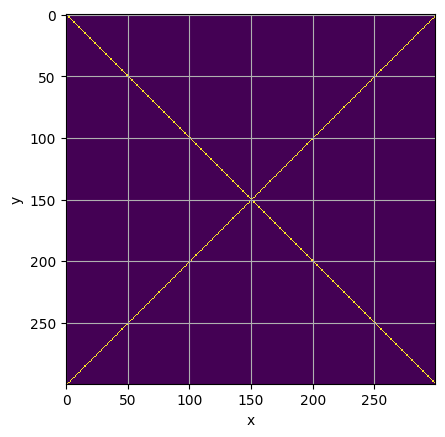

In [62]:
box_size = (300,300)
lattice = np.zeros(box_size)
for i in range(300): 
    lattice[i,i] = 1
    lattice[i,-i] = 1

plot_grid(lattice)

for i in range(300):
    lattice = update(lattice)
    if i%5 == 0: plot_grid(lattice,True,i)

crear_gif('Imagenes/','GIF/sin_optimizar.gif')

## Optimizacion

In [63]:
def update(lattice):
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])

    neighbors = convolve2d(lattice, kernel, mode='same', boundary='fill', fillvalue=0)


    new_lattice = (neighbors == 3) | ((lattice == 1) & (neighbors == 2))
    
    return new_lattice.astype(int)

### Prueba Optimizada

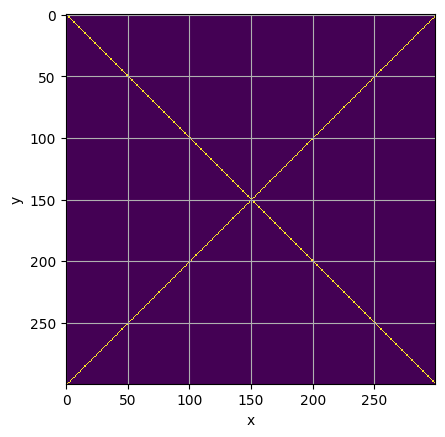

GIF guardado


In [64]:
box_size = (300,300)
lattice = np.zeros(box_size)
for i in range(300): 
    lattice[i,i] = 1
    lattice[i,-i] = 1

plot_grid(lattice)

for i in range(300):
    lattice = update(lattice)
    if i%5 == 0: plot_grid(lattice,True,i)

crear_gif('Imagenes/','GIF/optimizado.gif')

## Authors:
* Chiquete Ayala Paulina
* Monroy Minero Diego